In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import fashion_mnist

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [16]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker", "Bag", "Ankle boot"]

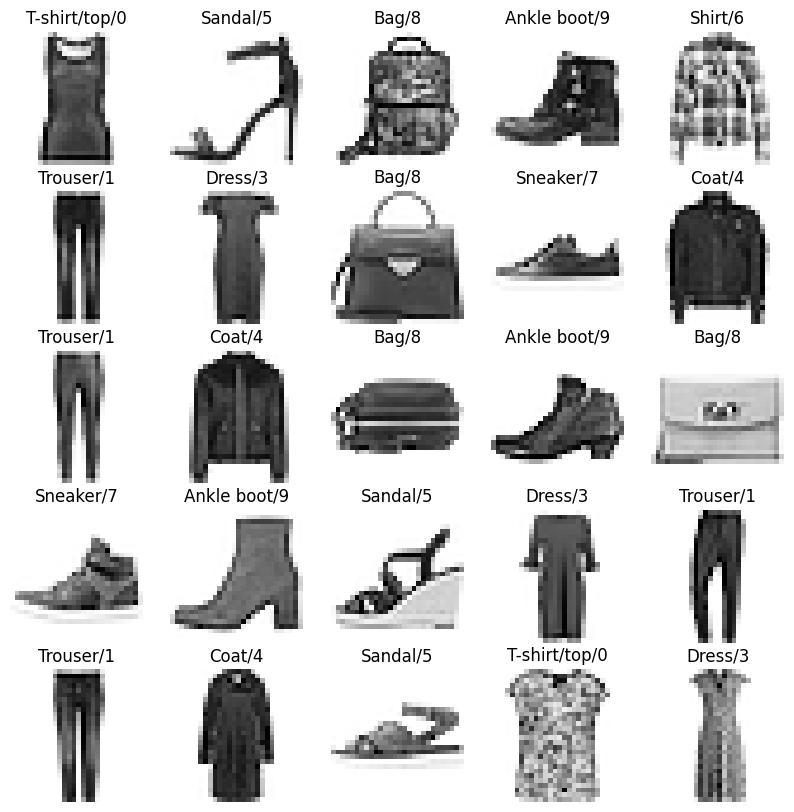

In [19]:
plt.figure(figsize=(10,10))
j = 1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(x_train[i],cmap="Greys")
    plt.axis("off")
    plt.title("{}/{}".format(class_labels[y_train[i]],y_train[i]))

In [27]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [28]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [29]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

In [37]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation="relu"),
    keras.layers.Dense(units=10,activation="softmax")
])

In [39]:
model.compile(
    optimizer= "adam",
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [41]:
model.fit(x_train, y_train, epochs=30, batch_size=512, verbose=True, validation_data=(x_val, y_val))

Epoch 1/30
94/94 [==============================] - 14s 139ms/step - loss: 0.6150 - accuracy: 0.7926 - val_loss: 0.4406 - val_accuracy: 0.8455
Epoch 2/30
94/94 [==============================] - 13s 137ms/step - loss: 0.4061 - accuracy: 0.8589 - val_loss: 0.3927 - val_accuracy: 0.8634
Epoch 3/30
94/94 [==============================] - 12s 131ms/step - loss: 0.3620 - accuracy: 0.8743 - val_loss: 0.3581 - val_accuracy: 0.8755
Epoch 4/30
94/94 [==============================] - 12s 122ms/step - loss: 0.3301 - accuracy: 0.8839 - val_loss: 0.3212 - val_accuracy: 0.8865
Epoch 5/30
94/94 [==============================] - 12s 128ms/step - loss: 0.3067 - accuracy: 0.8916 - val_loss: 0.3121 - val_accuracy: 0.8891
Epoch 6/30
94/94 [==============================] - 11s 121ms/step - loss: 0.2814 - accuracy: 0.8992 - val_loss: 0.2985 - val_accuracy: 0.8960
Epoch 7/30
94/94 [==============================] - 12s 127ms/step - loss: 0.2668 - accuracy: 0.9046 - val_loss: 0.2921 - val_accuracy: 0.8968

In [43]:
model.predict(np.expand_dims(x_test[1],axis=0)).round(2)

1/1 [==============================] - 0s 186ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred = model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.04, 0.01, 0.  ]], dtype=float32)

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3060 - accuracy: 0.9092


[0.3060303330421448, 0.9092000126838684]

<Axes: >

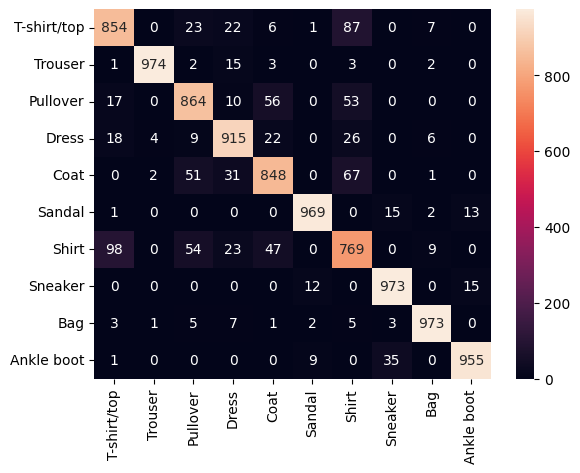

In [49]:
from sklearn.metrics import confusion_matrix
y_pred_labels = [np.argmax(label) for label in y_pred]
cnf = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cnf,annot=True,fmt="d",xticklabels=class_labels,yticklabels= class_labels)

In [48]:
from sklearn.metrics import classification_report
clf = classification_report(y_test,y_pred_labels,target_names= class_labels)
print(clf)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.86      0.85      0.86      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.76      0.77      0.77      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

